# Homework 2 - Problem 1
### Optimization theory with applications


#### Andrea Senacheribbe
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

The function we want to minimise is

$$f(x_1, x_2, ..., x_m)= \sum_{i=1}^{m} a_i(x_i-b_i)^2 \ + 3$$

for which we assume $a_i>0$ to have convexity.


We can compute the gradient of $f$, which is

$$ \nabla f(\underline{x})\ |_i= 2 a_i (x_i - b_i)$$

for each component $i$.

By imposing $\nabla f(\underline{x}) = 0$ we can analytically compute the minumum of the function:

$$ \nabla f(\underline{x}) = 0 \implies x_i^*=b_i \quad \forall i$$

$$ f (\underline{x}^*)=3$$

We use this to compare with the numerical result we get by running the optimisation algorithms.

The Hessian is instead a diagonal matrix, given by

$$ \nabla^2 f(\underline{x})\ |_{i=j}= 2 a_i$$
for component $i=j$ and $0$ elsewhere.

Notice that since the matrix is diagonal, the eigenvalues are simply the elements on the diagonal.

$$\lambda_{max}=max (2 a_i)\quad
\lambda_{min}=min(2 a_i)$$

By chosing $a_i>0$, the function results both Lipschitz ($L=\lambda_{max}$) and strongly convex ($m=\lambda_{min}$).

In [2]:
f = lambda x,a,b: np.sum(a*((x-b)**2))+3

grad_f = lambda x,a,b: 2*a*(x-b) #elementwise multiplication

f_opt=3

## 1) Gradient descent algorithm with fixed step size

In [3]:
def grad_desc_fixt(x0, grad, fun, t, eps=1e-6, max_iter=10000):
    x=np.ones(x0.size, dtype=np.float64)
    g=np.ones(x0.size, dtype=np.float64)
    f=np.ones(max_iter, dtype=np.float64)

    x=x0.copy()
    
    for k in range(max_iter-1):
        g=grad(x)
        f[k]=fun(x)
        
        if np.linalg.norm(g, 2) < eps:
            print("converged after %d iterations" % k)
            break
        
        x=x-t*g
        
    else: #reached max_iter-1
        k=max_iter-1
        f[k]=fun(x)

        print("stopped since reached max_iter")
        
    return x, f[:k+1]

## 2) Gradient descent algorithm with backtracking

In [4]:
def grad_desc_bkt(x0, grad, fun, t_init, alpha=0.5, beta=0.5, eps=1e-6, max_iter=10000):
    x=np.ones(x0.size, dtype=np.float64)
    g=np.ones(x0.size, dtype=np.float64)
    f=np.ones(max_iter, dtype=np.float64)

    x=x0.copy()
    t=t_init
    
    for k in range(max_iter-1):
        g=grad(x)
        f[k]=fun(x)
        
        norm_g=np.linalg.norm(g, 2)
        if  norm_g < eps:
            print("converged after %d iterations" % k)
            break
            
        m=alpha*(norm_g**2)
        while fun(x-t*g) > f[k]-t*m:
            t*=beta
            
        x=x-t*g
        
    else: #reached max_iter-1
        k=max_iter-1
        f[k]=fun(x)
        print("stopped since reached max_iter")
        
    return x, f[:k+1]

## 3) Function with low condition number

We set $m=500$, $a_i=1$, $b_i=\textit{uniform_integer}(0,100)$ and $x_i=0$

In [5]:
np.random.seed(1) # set the seed so to have consistent results among different runnings

In [6]:
m=500
a=np.ones(m)
b=np.random.randint(0,100+1, size=m)
a.shape, b.shape

((500,), (500,))

In [7]:
x0=np.zeros(m)

fixed t=0.45		converged after 10 iterations
fixed t=0.50		converged after 1 iterations
backtrack t_init=1.00	converged after 1 iterations
backtrack t_init=5.00	converged after 23 iterations


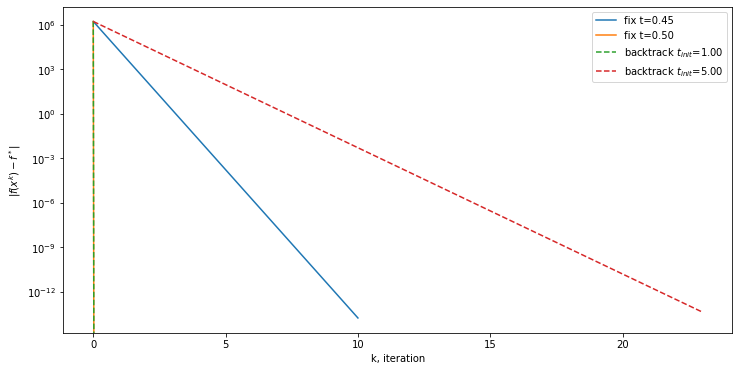

In [8]:
t_s=[0.45, 0.5]
t_init_s=[1, 5]

plt.figure(figsize=(12,6))
for t in t_s:
    print("fixed t=%.2f\t\t"%t, end='')
    x_fixt,f_fixt=grad_desc_fixt(x0, lambda x: grad_f(x,a,b),lambda x: f(x,a,b), t)
    plt.semilogy(np.abs(f_fixt-f_opt))
    
for t_init in t_init_s:
    print("backtrack t_init=%.2f\t"%t_init, end='')
    x_bkt,f_bkt=grad_desc_bkt(x0, lambda x: grad_f(x,a,b), lambda x: f(x,a,b), t_init)
    plt.semilogy(np.abs(f_bkt-f_opt), '--')

plt.ylabel("$|f(x^{k}) - f^*|$")
plt.xlabel("k, iteration")
plt.legend(["fix t=%.2f" % t for t in t_s] +["backtrack $t_{init}$=%.2f" % t_init for t_init in t_init_s]);

In [9]:
t_s=[0.2, 0.4,0.45, 0.5, 0.55, 0.6, 0.8, 1]
t_init_s=[0.2, 0.4, 0.5, 0.6, 0.8, 1, 5, 10]

for t in t_s:
    print("fixed t=%.2f\t\t"%t, end='')
    grad_desc_fixt(x0, lambda x: grad_f(x,a,b),lambda x: f(x,a,b), t)

print('\n')
    
for t_init in t_init_s:
    print("backtrack t_init=%.2f\t"%t_init, end='')
    grad_desc_bkt(x0, lambda x: grad_f(x,a,b), lambda x: f(x,a,b), t_init)

fixed t=0.20		converged after 43 iterations
fixed t=0.40		converged after 14 iterations
fixed t=0.45		converged after 10 iterations
fixed t=0.50		converged after 1 iterations
fixed t=0.55		converged after 10 iterations
fixed t=0.60		converged after 14 iterations
fixed t=0.80		converged after 43 iterations
fixed t=1.00		stopped since reached max_iter


backtrack t_init=0.20	converged after 43 iterations
backtrack t_init=0.40	converged after 14 iterations
backtrack t_init=0.50	converged after 1 iterations
backtrack t_init=0.60	converged after 24 iterations
backtrack t_init=0.80	converged after 14 iterations
backtrack t_init=1.00	converged after 1 iterations
backtrack t_init=5.00	converged after 23 iterations
backtrack t_init=10.00	converged after 23 iterations


### Stopping condition

For both algorithms the chosen stopping condition is on the norm of the gradient $|| \nabla f(x) ||_2 < \epsilon$. Since the function is convex, when the gradient becomes small we are close to the minimum ($\nabla f(x) =0$). To avoid infinite loop, the algorithm is also stopped if a maximum number of iterations is exceeded.

### Step size and convergence for gradient descent with fixed step size

Different values of step size are chosen and compared against each others. Recalling from above that the function is Lipschitz and stongly convex with $L=\lambda_{max}=2$ and $m=\lambda_{min}=2$, we can compute the maximum step size to guarantee exponential convergence $O(log(1/e))$ (which corresponds to a line in log scale) as following:

$$
t\le \frac{2}{m+L}=0.5
$$

Indeed from the plots we can notice a exponential convergence for the cases t=0.45. For t=0.5 the algorithms converges after only one iteration.

In the table above, we run the simualation with additional values of $t$. We can notice that for $t=[0.55, 0.6, 0.8]$ we still have exponential convergence but with an higher number of iterations. With $t=1$ the algorithm is not able to converge and it's stopped since it reaches the maximum number of iterations (10000).

### Step size and convergence for gradient descent with backtracking
For the case with backtracking the choice of $t$ is much less critical, since the algorithm is able to adjust it to the function analysed. Indeed as can be seen from the table, even an initial choice of $t=10$ allows the algorithm to converge. From the plot we can notice that the convergence is still exponential, similar to the one of gradient descent with fixed step size.


Good convergence also for the point $x$ with respect to the actual minimum $x^*=b$ :

In [10]:
np.linalg.norm(b-x_fixt, 2), np.linalg.norm(b-x_bkt, 2)

(0.0, 2.0511206851967165e-07)

# 4) Function with high condition number

We set $m=500$, $a_i=\textit{uniform_integer}(1,100)$, $b_i=\textit{uniform_integer}(1,100)$ and $x_i=0$

In [11]:
np.random.seed(2)

In [12]:
m=500
a=np.random.randint(1,100+1, size=m)
b=np.random.randint(1,100+1, size=m)
a.shape, b.shape

((500,), (500,))

In [13]:
x0=np.zeros(m)

Notice that by setting $a_i$ in the range $[1,100]$ we have an higher condition number $L/m =  100$. 
The function is no longer symmetric but has different slopes from different axis.

In [14]:
print("L =", 2*np.max(a), "    m =", 2*np.min(a), "    L/m =", np.max(a)/np.min(a))

L = 200     m = 2     L/m = 100.0


fixed t=0.009901	converged after 1191 iterations
backtrack t_init=0.50	converged after 2461 iterations


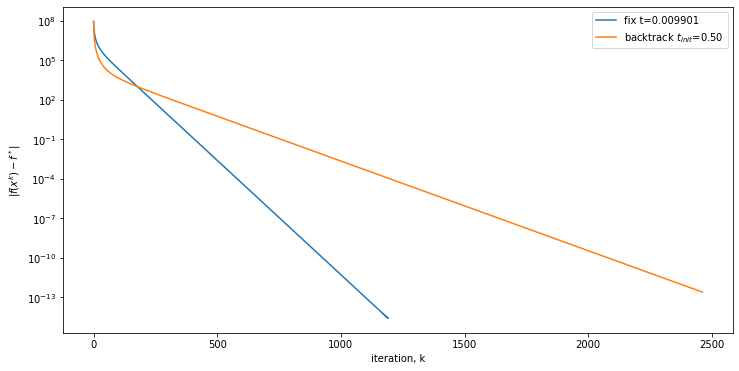

In [15]:
t=1/(np.min(a)+np.max(a))
t_init=.5

plt.figure(figsize=(12,6))

print("fixed t=%f\t"%t, end='')
x_fixt,f_fixt=grad_desc_fixt(x0, lambda x: grad_f(x,a,b),lambda x: f(x,a,b), t, max_iter=10000)
plt.semilogy(np.abs(f_fixt-f_opt))

print("backtrack t_init=%.2f\t"%t_init, end='')
x_bkt,f_bkt=grad_desc_bkt(x0, lambda x: grad_f(x,a,b), lambda x: f(x,a,b), t_init, max_iter=10000)
plt.semilogy(np.abs(f_bkt-f_opt))

plt.ylabel("$|f(x^{k}) - f^*|$")
plt.xlabel("iteration, k")
plt.legend(["fix t=%f" % t, "backtrack $t_{init}$=%.2f" % t_init]);

### Stopping condition
The same stopping condition of before is applied, $|| \nabla f(x) ||_2 < \epsilon$.

### Step size and convergence for gradient descent with fixed step size
From $L$ and $m$ computed before, we can obtain the maximum step size to guarantee exponential convergence

$$
t\le \frac{2}{m+L}=0.009901
$$

Indeed by choosing this value for $t$ the algorithm converges again exponentially, but takes many more iterations than 3) because of the higher condition number.

### Step size and convergence for gradient descent with fixed step size
Again the choice of the initial step size is not critical. The algorithm converges exponentially (asymptotically), even if it requires more iteration then the standard gradient descent with fixed value for $t$

Again good convergence of the point $x$ with respect to the actual minimum $x^*=b$ :

In [16]:
np.linalg.norm(b-x_fixt, 2), np.linalg.norm(b-x_bkt, 2)

(7.3350806574294104e-09, 4.97657290731376e-07)